In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import shutil

In [106]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [108]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [109]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [110]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [111]:
df.drop('Over18', axis=1, inplace=True)
print("'Over18' column dropped as all values are the same")

'Over18' column dropped as all values are the same


In [112]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

outliers_iqr = detect_outliers_iqr(df)
print("\nTotal Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count}")


Total Outliers detected using IQR method:
Age: 0
DailyRate: 0
DistanceFromHome: 0
Education: 0
EmployeeCount: 0
EmployeeNumber: 0
EnvironmentSatisfaction: 0
HourlyRate: 0
JobInvolvement: 0
JobLevel: 0
JobSatisfaction: 0
MonthlyIncome: 114
MonthlyRate: 0
NumCompaniesWorked: 52
PercentSalaryHike: 0
PerformanceRating: 226
RelationshipSatisfaction: 0
StandardHours: 0
StockOptionLevel: 85
TotalWorkingYears: 63
TrainingTimesLastYear: 238
WorkLifeBalance: 0
YearsAtCompany: 104
YearsInCurrentRole: 21
YearsSinceLastPromotion: 107
YearsWithCurrManager: 14


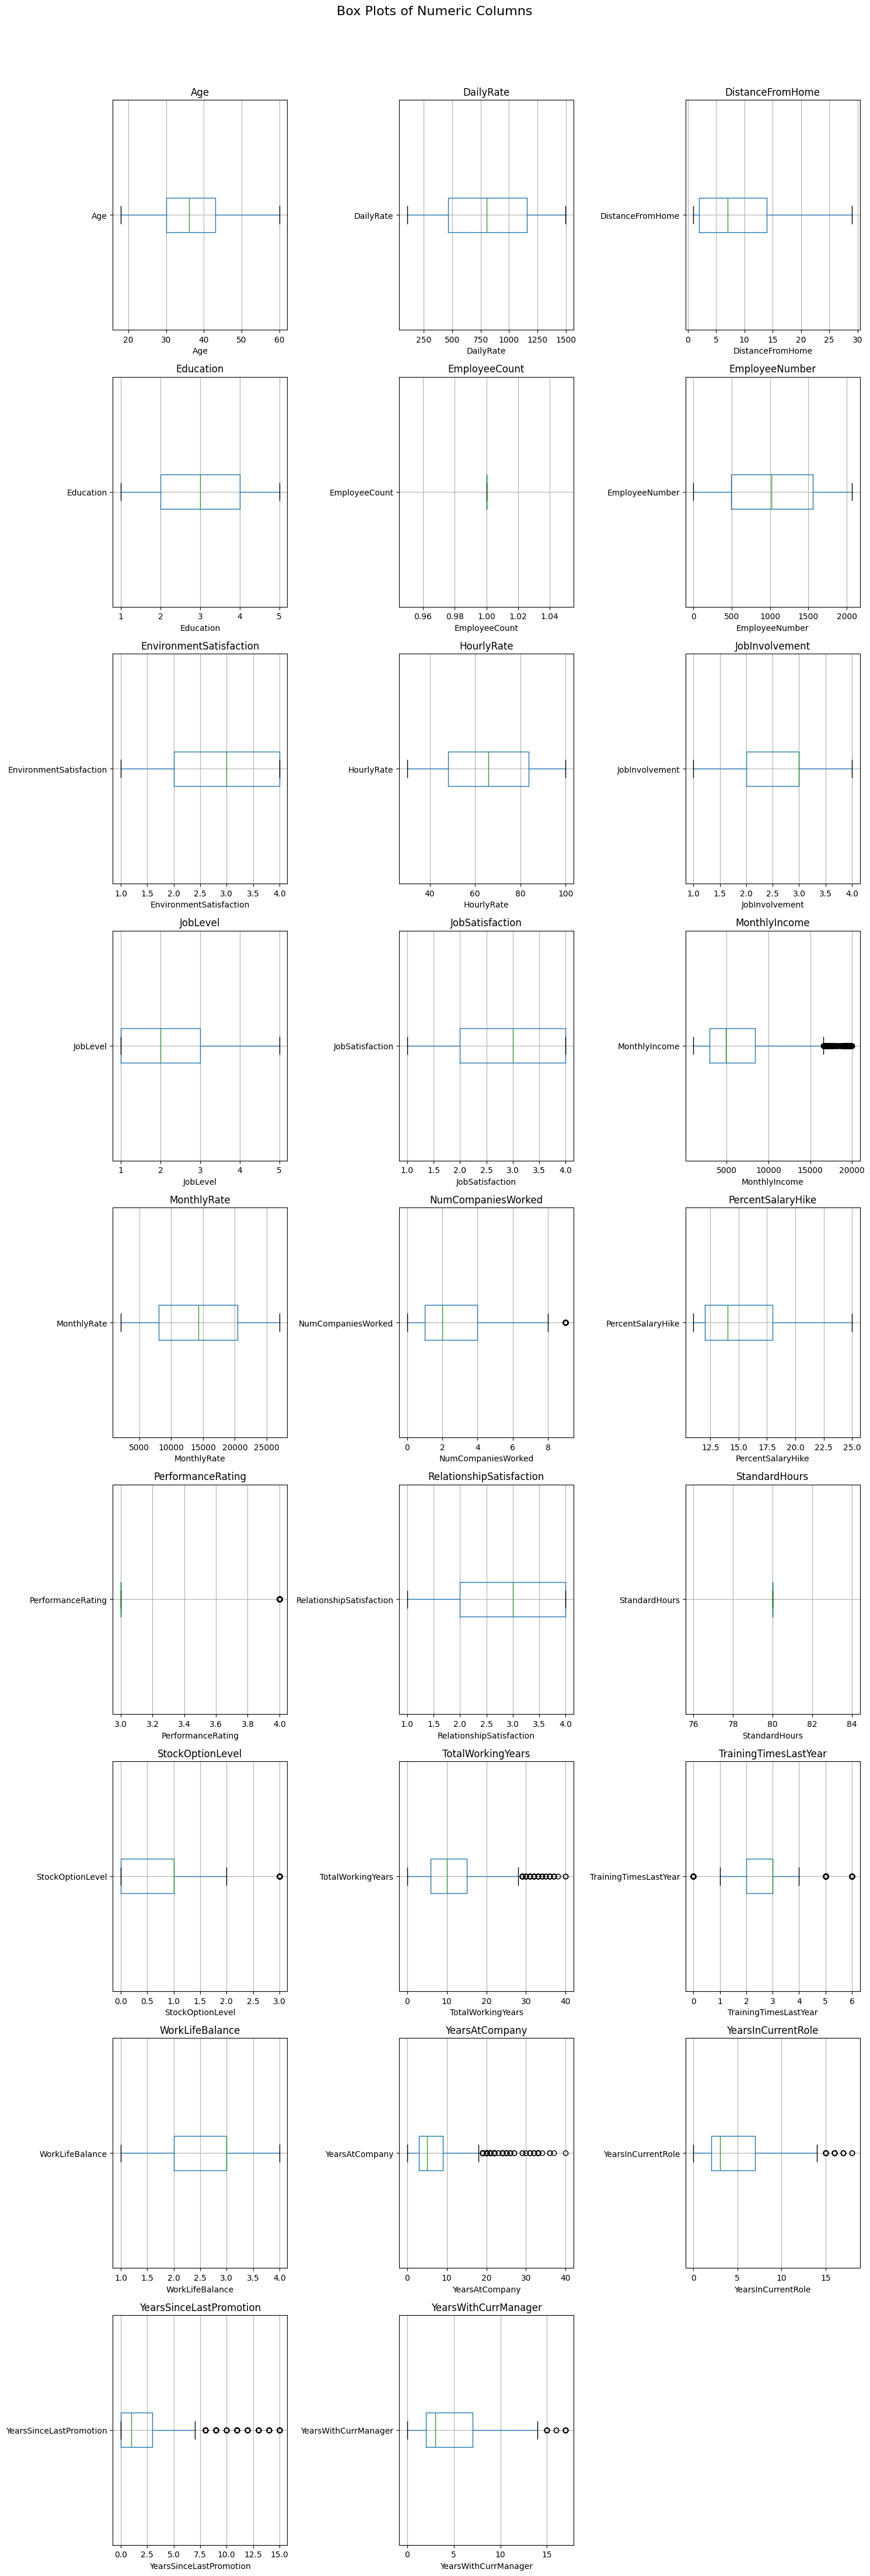

In [113]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle("Box Plots of Numeric Columns", fontsize=16)
axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):
    df.boxplot(column=col, ax=ax, vert=False)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [114]:
def remove_outliers_iqr(df):
    outlier_indices = set()
    for col in df.select_dtypes(include=[np.number]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers)
    return df.drop(index=outlier_indices), len(outlier_indices)

df_cleaned, total_removed = remove_outliers_iqr(df)
print(f"\nTotal Outliers removed: {total_removed}")
df_cleaned.info()


Total Outliers removed: 691
<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 2 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       779 non-null    int64 
 1   Attrition                 779 non-null    object
 2   BusinessTravel            779 non-null    object
 3   DailyRate                 779 non-null    int64 
 4   Department                779 non-null    object
 5   DistanceFromHome          779 non-null    int64 
 6   Education                 779 non-null    int64 
 7   EducationField            779 non-null    object
 8   EmployeeCount             779 non-null    int64 
 9   EmployeeNumber            779 non-null    int64 
 10  EnvironmentSatisfaction   779 non-null    int64 
 11  Gender                    779 non-null    object
 12  HourlyRate                779 non-null    int64 
 13  JobInvolvement            779 non-null    int64 
 14  J

In [115]:
binary_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2]
print("Binary columns in the dataset:")
print(binary_columns)

label_encoder = LabelEncoder()
binary_mappings = {}

for col in binary_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    binary_mappings[col] = mapping

print("\nMappings for binary columns:")
for col, mapping in binary_mappings.items():
    print(f"{col}: {mapping}")

Binary columns in the dataset:
['Attrition', 'Gender', 'OverTime']

Mappings for binary columns:
Attrition: {'No': 0, 'Yes': 1}
Gender: {'Female': 0, 'Male': 1}
OverTime: {'No': 0, 'Yes': 1}


In [116]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
11,29,0,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,0,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [117]:
multi_class_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() > 2 and df_cleaned[col].dtype == 'object']

label_encoder = LabelEncoder()
multi_class_mappings = {}

for col in multi_class_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
    mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    multi_class_mappings[col] = mapping

print("\nFinal Mappings for multi-class columns:")
for col, mapping in multi_class_mappings.items():
    print(f"{col}: {mapping}")


Final Mappings for multi-class columns:
BusinessTravel: {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Department: {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
EducationField: {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
JobRole: {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
MaritalStatus: {'Divorced': 0, 'Married': 1, 'Single': 2}


In [118]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
9,36,0,2,1299,1,27,3,3,1,13,...,2,80,2,17,3,2,7,7,7,7
11,29,0,2,153,1,15,2,1,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,0,325,1,5,3,3,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,0,2,1167,2,5,3,4,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [125]:
df_min_max = df_cleaned.copy()
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
min_max_scaler = MinMaxScaler()
df_min_max[numeric_columns] = min_max_scaler.fit_transform(df_min_max[numeric_columns])

df_min_max

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,0.452381,1.0,1.0,0.910394,0.5,0.035714,0.25,0.8,0.0,0.000000,...,0.333333,0.0,0.0,0.250000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.924014,0.5,0.071429,0.75,0.2,0.0,0.000484,...,0.666667,0.0,0.0,0.285714,0.666667,0.666667,0.444444,0.500000,0.428571,0.000000
5,0.333333,0.0,0.5,0.646595,0.5,0.035714,0.25,0.2,0.0,0.001938,...,0.666667,0.0,0.0,0.285714,0.333333,0.333333,0.388889,0.500000,0.428571,0.461538
9,0.428571,0.0,1.0,0.857348,0.5,0.928571,0.50,0.6,0.0,0.004360,...,0.333333,0.0,1.0,0.607143,0.666667,0.333333,0.388889,0.500000,1.000000,0.538462
11,0.261905,0.0,1.0,0.035842,0.5,0.500000,0.25,0.2,0.0,0.005329,...,1.000000,0.0,0.0,0.357143,0.666667,0.666667,0.500000,0.357143,0.000000,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.309524,0.0,0.0,0.159140,0.5,0.142857,0.50,0.6,0.0,0.994671,...,0.333333,0.0,0.0,0.357143,0.333333,0.666667,0.500000,0.285714,0.142857,0.538462
1464,0.190476,0.0,1.0,0.762724,1.0,0.142857,0.50,0.8,0.0,0.996124,...,1.000000,0.0,0.0,0.178571,0.333333,0.666667,0.222222,0.142857,0.000000,0.000000
1465,0.428571,0.0,0.5,0.559857,0.5,0.785714,0.25,0.6,0.0,0.996609,...,0.666667,0.0,0.5,0.607143,0.666667,0.666667,0.277778,0.142857,0.000000,0.230769
1468,0.738095,0.0,0.5,0.659498,1.0,0.035714,0.50,0.6,0.0,0.998547,...,1.000000,0.0,0.0,0.607143,0.666667,0.333333,0.500000,0.428571,0.000000,0.615385


In [124]:
df_min_max.to_csv('df_min_max.csv', index=False)
shutil.move('df_min_max.csv', './df_min_max.csv')

'./df_min_max.csv'

In [122]:
df = pd.read_csv('df_min_max.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       779 non-null    float64
 1   Attrition                 779 non-null    float64
 2   BusinessTravel            779 non-null    float64
 3   DailyRate                 779 non-null    float64
 4   Department                779 non-null    float64
 5   DistanceFromHome          779 non-null    float64
 6   Education                 779 non-null    float64
 7   EducationField            779 non-null    float64
 8   EmployeeCount             779 non-null    float64
 9   EmployeeNumber            779 non-null    float64
 10  EnvironmentSatisfaction   779 non-null    float64
 11  Gender                    779 non-null    float64
 12  HourlyRate                779 non-null    float64
 13  JobInvolvement            779 non-null    float64
 14  JobLevel  